<a href="https://colab.research.google.com/github/nagashreem363/Deep-Learning/blob/main/perceptron_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Perceptron

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as ply
import pandas as pd

In [8]:
data=pd.read_csv('/content/Campus_Selection.csv')
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


<Axes: xlabel='hsc_p', ylabel='degree_p'>

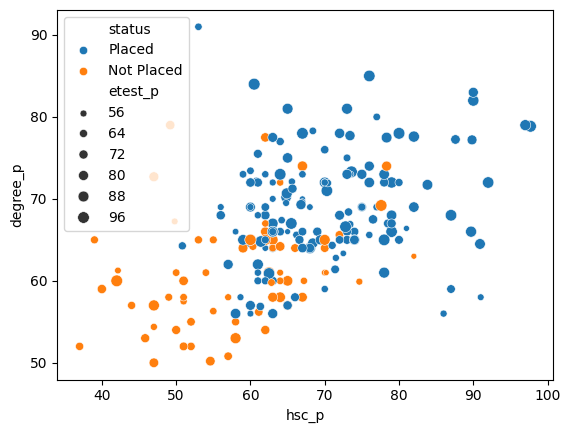

In [12]:
sns.scatterplot(x='hsc_p', y='degree_p', size='etest_p', hue='status', data=data)

In [14]:
x=data.drop('status', axis=1)
y=data['status']

In [16]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Identify categorical columns
categorical_features = x.select_dtypes(include=['object']).columns

# Create a column transformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough')
# Create a pipeline with the preprocessor and the Perceptron model
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', Perceptron())])

# Train the model
model.fit(x, y)

print("Model training complete.")

Model training complete.


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets (e.g., 80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Retrain the model on the training data
model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(x_test)

# Calculate the accuracy on the testing data
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy on Test Data: {accuracy:.4f}")

Model Accuracy on Test Data: 0.4419
